In [142]:
import pandas as pd
import numpy as np
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [143]:
df=pd.read_csv("C:\\Users\\user\\OneDrive\\Documents\\setiment_analysis.csv")

In [144]:
pf=pd.DataFrame(df)


In [145]:
pf

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [146]:
pf.drop('Year',axis=1,inplace=True)

In [147]:
pf.drop('Month',axis=1,inplace=True)

In [148]:
pf.drop('Time of Tweet',axis=1,inplace=True)

In [149]:
pf.drop('Platform',axis=1,inplace=True)

In [150]:
pf.columns

Index(['Day', 'text', 'sentiment'], dtype='object')

In [151]:
pf['sentiment'].isnull().sum()

0

In [155]:
pf.drop('Day',axis=1,inplace=True)

In [156]:
pf

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative
...,...,...
494,"According to , a quarter of families under six...",negative
495,the plan to not spend money is not going well,negative
496,uploading all my bamboozle pictures of facebook,neutral
497,congratulations ! you guys finish a month ear...,positive


In [157]:
pf.isnull().sum()

text         0
sentiment    0
dtype: int64

In [158]:
len(pf)

499

In [159]:
pf

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative
...,...,...
494,"According to , a quarter of families under six...",negative
495,the plan to not spend money is not going well,negative
496,uploading all my bamboozle pictures of facebook,neutral
497,congratulations ! you guys finish a month ear...,positive


In [160]:
pf['sentiment'].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [162]:
pf['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [164]:
len(pf)

499

In [92]:
stem=PorterStemmer()

In [165]:
sentence=[]
for i in range(len(pf)):
    clean=re.sub("[^a-zA-Z]"," ",pf["text"][i])
    clean=clean.lower()
    clean=clean.split()
    clean=[stem.stem(words) for words in clean if words not in stopwords.words("english")]
    text=" ".join(clean)
    sentence.append(text)

In [166]:
sentence

['great day look like dream',
 'feel sorri miss sea beach',
 'angri',
 'attend class listen teacher read slide nonsenc',
 'want go let go',
 'night feel neutral',
 'feed babi fun smile coo',
 'soooo high',
 '',
 'today first time arriv boat amaz journey',
 'love someth like e mc rule',
 'realli realli like song cardigan taylor swift',
 'sharpi run danger low ink',
 'want go music tonight lost voic',
 'alway somewher miss',
 'distrub',
 'care',
 'sick past day',
 'come back home past job realli good time',
 'never fall love found',
 'oh maya sorri hope find soon',
 'play kid amaz',
 'clean hous famili com later today',
 'tri shtdown pc accenditenli click restart button realli disgust',
 'follow follow',
 'amaz game play everyday',
 'sorri',
 'villag hardli found intern feel gloomi',
 'juss came back baris',
 'went sleep power cut villag',
 'look like compani new logo',
 'buy sophi world book realli happi',
 'consol got bmi test hahaha say obes well much unhappi minut',
 'funni cute kid'

In [167]:
len(sentence)

499

In [168]:
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot

In [183]:
pf['sentiment'].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [184]:
value={
    'negative':0,
    'neutral':1,
    'positive':2
}

In [185]:
pf['sentiment']=pf['sentiment'].map(value)

In [186]:
pf['sentiment'].unique()

array([2, 0, 1], dtype=int64)

In [187]:
pf['sentiment'].isnull().sum()

0

In [188]:
y=pf['sentiment']

In [191]:
print(y,end=" ")

0      2
1      2
2      0
3      0
4      0
      ..
494    0
495    0
496    1
497    2
498    0
Name: sentiment, Length: 499, dtype: int64 

In [192]:
len(y)

499

In [169]:
vocab_size=400

In [170]:
embed_vector=[one_hot(word,vocab_size) for word in sentence]

In [171]:
embed_vector

[[290, 158, 12, 174, 230],
 [58, 110, 64, 278, 125],
 [260],
 [144, 32, 295, 361, 105, 45, 46],
 [127, 240, 395, 240],
 [103, 58, 395],
 [142, 255, 137, 18, 336],
 [214, 313],
 [],
 [356, 182, 309, 371, 73, 215, 277],
 [370, 348, 174, 354, 260, 302],
 [91, 91, 174, 196, 323, 63, 165],
 [143, 318, 69, 147, 72],
 [127, 240, 130, 29, 217, 133],
 [239, 147, 64],
 [141],
 [312],
 [300, 103, 158],
 [251, 128, 55, 103, 248, 91, 227, 309],
 [96, 321, 370, 385],
 [106, 98, 110, 186, 135, 138],
 [220, 127, 215],
 [239, 291, 313, 115, 305, 356],
 [70, 275, 2, 299, 151, 354, 196, 91, 340],
 [170, 170],
 [215, 112, 220, 331],
 [110],
 [270, 125, 385, 253, 58, 51],
 [228, 140, 128, 257],
 [360, 35, 36, 208, 270],
 [12, 174, 182, 194, 86],
 [342, 125, 222, 317, 91, 36],
 [150, 30, 152, 185, 14, 381, 277, 20, 140, 266, 333],
 [186, 256, 127],
 [60, 131, 112, 176, 70, 226, 14, 138, 231, 186, 220, 206],
 [264, 151, 346, 289, 396],
 [92, 119, 200, 182, 378, 103, 398, 115, 64, 245],
 [78, 291, 91, 316, 35

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Embedding,Dropout,LSTM,RNN,GRU

In [173]:
from tensorflow.keras.utils import pad_sequences

In [174]:
max_length=max([len(i) for i in embed_vector])

In [175]:
max_length

19

In [176]:
pad_vector=pad_sequences(embed_vector,padding="post",maxlen=max_length)

In [177]:
pad_vector

array([[290, 158,  12, ...,   0,   0,   0],
       [ 58, 110,  64, ...,   0,   0,   0],
       [260,   0,   0, ...,   0,   0,   0],
       ...,
       [114, 262,  35, ...,   0,   0,   0],
       [256, 210, 294, ...,   0,   0,   0],
       [216, 262, 128, ...,   0,   0,   0]])

In [178]:
model=Sequential()


In [220]:
model.add(Embedding(vocab_size,30,input_length=max_length))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [221]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [222]:
len(pad_vector)

499

In [223]:
from sklearn.model_selection import train_test_split

In [239]:
x_train,x_test,y_train,y_test=train_test_split(pad_vector,y,test_size=0.1,random_state=3,stratify=y)

In [225]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((449, 19), (50, 19), (449,), (50,))

In [226]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:664: UserWarning: Gradients do not exist for variables ['embeddings', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'recurrent_kernel', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.3105 - loss: 0.6793 - val_accuracy: 0.4000 - val_loss: 0.6331
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4046 - loss: 0.5923 - val_accuracy: 0.4600 - val_loss: 0.5400
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6138 - loss: 0.4481 - val_accuracy: 0.4600 - val_loss: 0.3742
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5553 - loss: 0.1274 - val_accuracy: 0.4600 - val_loss: 0.0994
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6011 - loss: -0.2966 - val_accuracy: 0.4600 - val_loss: -0.0887
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5995 - loss: -0.7317 - val_accuracy: 0.4600 - val_loss: -0.3219
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5800 - loss: -1.2436 - val_accuracy: 0.4600 - val_loss: -0.5635
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6064 - loss: -1.6679 - val_accuracy: 0.4600 

In [238]:
print(history)

In [229]:
import matplotlib.pyplot as plt

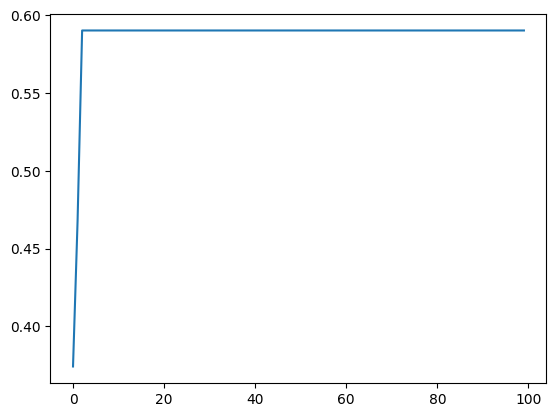

In [230]:
plt.plot(history.history['accuracy'])

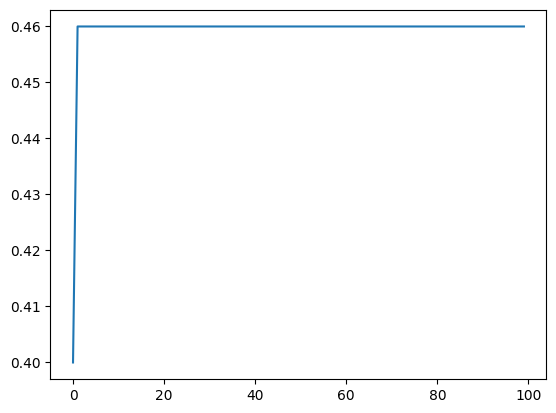

In [231]:
plt.plot(history.history['val_accuracy'])

In [232]:
loss,accuracy=model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4733 - loss: -7.5492


In [233]:
loss

-7.178868293762207

In [234]:
accuracy

0.46000000834465027